# Customer Churn Analysis

Challenge Chapter 2

DS-5 Kelompok 22

Nama Anggota:
- Fahrul Firmansyah
- Sahra Bilqis Fauziyyah

# Additional Package

In [ ]:
!pip install lightgbm
!pip install lazypredict

# Import Required Library

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, QuantileTransformer, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from lazypredict.Supervised import LazyClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Read Data

In [ ]:
df = pd.read_csv("Data Train.csv")
df.head()

state  account_length      area_code international_plan voice_mail_plan  \
0    OH             107  area_code_415                 no             yes   
1    NJ             137  area_code_415                 no              no   
2    OH              84  area_code_408                yes              no   
3    OK              75  area_code_415                yes              no   
4    MA             121  area_code_510                 no             yes   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     26             161.60              123   
1                      0             243.40              114   
2                      0             299.40               71   
3                      0             166.70              113   
4                     24             218.20               88   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             27.47             195.50              103             16.62   
1             41.38             121.20              110             10.30   
2             50.90              61.90               88              5.26   
3             28.34             148.30              122             12.61   
4             37.09             348.50              108             29.62   

   total_night_minutes  total_night_calls  total_night_charge  \
0               254.40                103               11.45   
1               162.60                104                7.32   
2               196.90                 89                8.86   
3               186.90                121                8.41   
4               212.60                118                9.57   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0               13.70                 3               3.70   
1               12.20                 5               3.29   
2                6.60                 7               1.78   
3               10.10                 3               2.73   
4                7.50                 7               2.03   

   number_customer_service_calls churn  
0                              1    no  
1                              0    no  
2                              2    no  
3                              3    no  
4                              3    no

# Exploratory Data Analysis

In [ ]:
df.shape

(4250, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
df.describe()

account_length  number_vmail_messages  total_day_minutes  \
count         4250.00                4250.00            4250.00   
mean           100.24                   7.63             180.26   
std             39.70                  13.44              54.01   
min              1.00                   0.00               0.00   
25%             73.00                   0.00             143.33   
50%            100.00                   0.00             180.45   
75%            127.00                  16.00             216.20   
max            243.00                  52.00             351.50   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count          4250.00           4250.00            4250.00          4250.00   
mean             99.91             30.64             200.17           100.18   
std              19.85              9.18              50.25            19.91   
min               0.00              0.00               0.00             0.00   
25%              87.00             24.36             165.93            87.00   
50%             100.00             30.68             200.70           100.00   
75%             113.00             36.75             233.78           114.00   
max             165.00             59.76             359.30           170.00   

       total_eve_charge  total_night_minutes  total_night_calls  \
count           4250.00              4250.00            4250.00   
mean              17.02               200.53              99.84   
std                4.27                50.35              20.09   
min                0.00                 0.00               0.00   
25%               14.10               167.22              86.00   
50%               17.06               200.45             100.00   
75%               19.87               234.70             113.00   
max               30.54               395.00             175.00   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count             4250.00             4250.00           4250.00   
mean                 9.02               10.26              4.43   
std                  2.27                2.76              2.46   
min                  0.00                0.00              0.00   
25%                  7.52                8.50              3.00   
50%                  9.02               10.30              4.00   
75%                 10.56               12.00              6.00   
max                 17.77               20.00             20.00   

       total_intl_charge  number_customer_service_calls  
count            4250.00                        4250.00  
mean                2.77                           1.56  
std                 0.75                           1.31  
min                 0.00                           0.00  
25%                 2.30                           1.00  
50%                 2.78                           1.00  
75%                 3.24                           2.00  
max                 5.40                           9.00

In [ ]:
numerical_col = df.select_dtypes(exclude=['object']).columns
categorical_col = df.select_dtypes(include=['object']).columns

## Univariate Analysis

### Categorical Columns

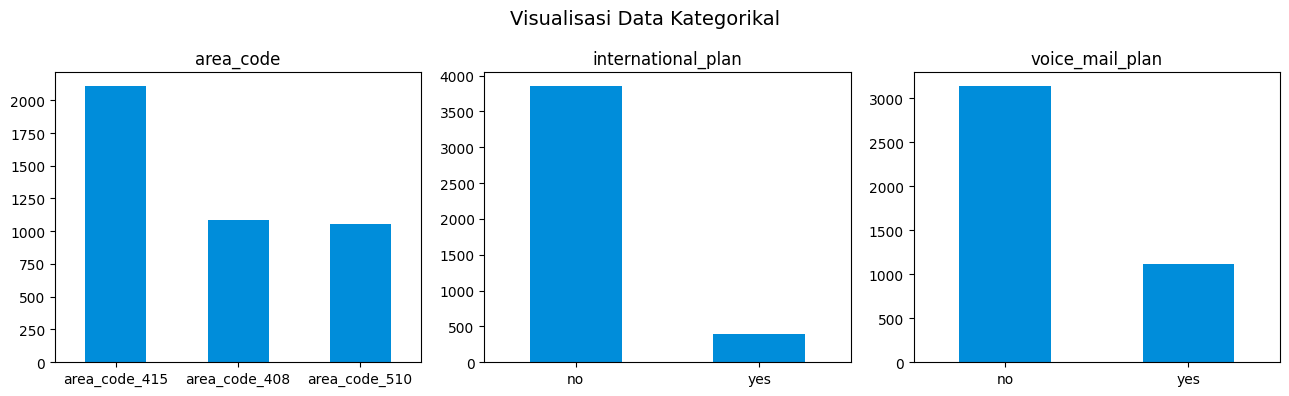

In [ ]:
fig, ax = plt.subplots(1, 3, sharey=False, sharex=False, figsize=(13,4))

iterator = 1
for j in range(3):
  df[categorical_col[iterator]].value_counts().plot(kind='bar', ax=ax[j], color=['#008DDA'])
  ax[j].set_title(categorical_col[iterator])
  ax[j].tick_params(axis='x', rotation=0)
  iterator+=1
plt.suptitle('Visualisasi Data Kategorikal', fontsize=14)
plt.tight_layout()

#### Kolom Churn

In [ ]:
churn = df[df['churn'] == 'yes']
no_churn = df[df['churn'] == 'no']

In [ ]:
churn.describe()

account_length  number_vmail_messages  total_day_minutes  \
count          598.00                 598.00             598.00   
mean           102.14                   4.30             208.99   
std             39.37                  11.12              69.18   
min              2.00                   0.00               0.00   
25%             76.00                   0.00             151.18   
50%            101.00                   0.00             220.55   
75%            125.00                   0.00             266.98   
max            225.00                  48.00             351.50   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count           598.00            598.00             598.00           598.00   
mean            100.48             35.53             209.96            99.84   
std              20.99             11.76              51.31            19.75   
min               0.00              0.00              70.90            48.00   
25%              87.00             25.70             172.15            87.00   
50%             101.00             37.50             210.20            99.50   
75%             114.00             45.38             248.10           113.00   
max             165.00             59.76             349.40           168.00   

       total_eve_charge  total_night_minutes  total_night_calls  \
count            598.00               598.00             598.00   
mean              17.85               206.33              99.21   
std                4.36                48.96              20.26   
min                6.03                47.40              42.00   
25%               14.64               172.83              84.00   
50%               17.87               206.10              99.00   
75%               21.09               241.25             114.00   
max               29.70               381.60             158.00   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count              598.00              598.00            598.00   
mean                 9.29               10.63              4.22   
std                  2.20                2.79              2.63   
min                  2.13                0.00              0.00   
25%                  7.78                8.80              2.00   
50%                  9.27               10.60              4.00   
75%                 10.86               12.70              5.00   
max                 17.17               20.00             20.00   

       total_intl_charge  number_customer_service_calls  
count             598.00                         598.00  
mean                2.87                           2.28  
std                 0.75                           1.83  
min                 0.00                           0.00  
25%                 2.38                           1.00  
50%                 2.86                           2.00  
75%                 3.43                           4.00  
max                 5.40                           9.00

In [ ]:
no_churn.describe()

account_length  number_vmail_messages  total_day_minutes  \
count         3652.00                3652.00            3652.00   
mean            99.92                   8.18             175.56   
std             39.75                  13.71              49.55   
min              1.00                   0.00               0.00   
25%             73.00                   0.00             142.50   
50%             99.00                   0.00             178.25   
75%            127.00                  20.00             210.70   
max            243.00                  52.00             313.80   

       total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
count          3652.00           3652.00            3652.00          3652.00   
mean             99.81             29.84             198.57           100.23   
std              19.66              8.42              49.90            19.94   
min               0.00              0.00               0.00             0.00   
25%              87.00             24.23             164.57            87.00   
50%             100.00             30.30             199.20           100.00   
75%             113.00             35.82             231.72           114.00   
max             160.00             53.35             359.30           170.00   

       total_eve_charge  total_night_minutes  total_night_calls  \
count           3652.00              3652.00            3652.00   
mean              16.88               199.58              99.94   
std                4.24                50.52              20.07   
min                0.00                 0.00               0.00   
25%               13.99               165.97              87.00   
50%               16.93               199.30             100.00   
75%               19.69               233.12             113.00   
max               30.54               395.00             175.00   

       total_night_charge  total_intl_minutes  total_intl_calls  \
count             3652.00             3652.00           3652.00   
mean                 8.98               10.19              4.46   
std                  2.27                2.75              2.43   
min                  0.00                0.00              0.00   
25%                  7.47                8.50              3.00   
50%                  8.97               10.30              4.00   
75%                 10.49               12.00              6.00   
max                 17.77               19.70             19.00   

       total_intl_charge  number_customer_service_calls  
count            3652.00                        3652.00  
mean                2.75                           1.44  
std                 0.74                           1.17  
min                 0.00                           0.00  
25%                 2.30                           1.00  
50%                 2.78                           1.00  
75%                 3.24                           2.00  
max                 5.32                           8.00

In [ ]:
# Menghitung jumlah pelanggan yang melakukan churn atau tidak
total_churn = df['churn'].value_counts()
print("\nJumlah pelanggan yang melakukan churn/tidak:")
print(total_churn)


Jumlah pelanggan yang melakukan churn/tidak:
no     3652
yes     598
Name: churn, dtype: int64


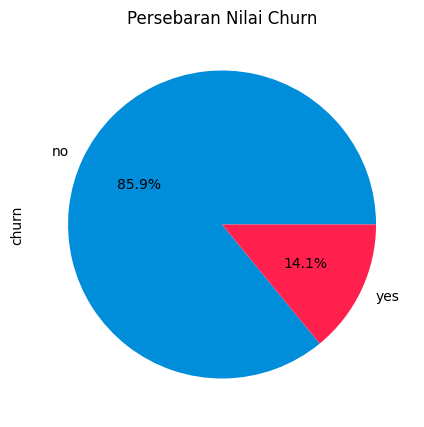

In [ ]:
df['churn'].value_counts().plot(kind='pie', figsize=(7, 5), autopct='%.1f%%', colors=['#008DDA','#FF204E'])
plt.title('Persebaran Nilai Churn')
plt.show()

### Numerical Features

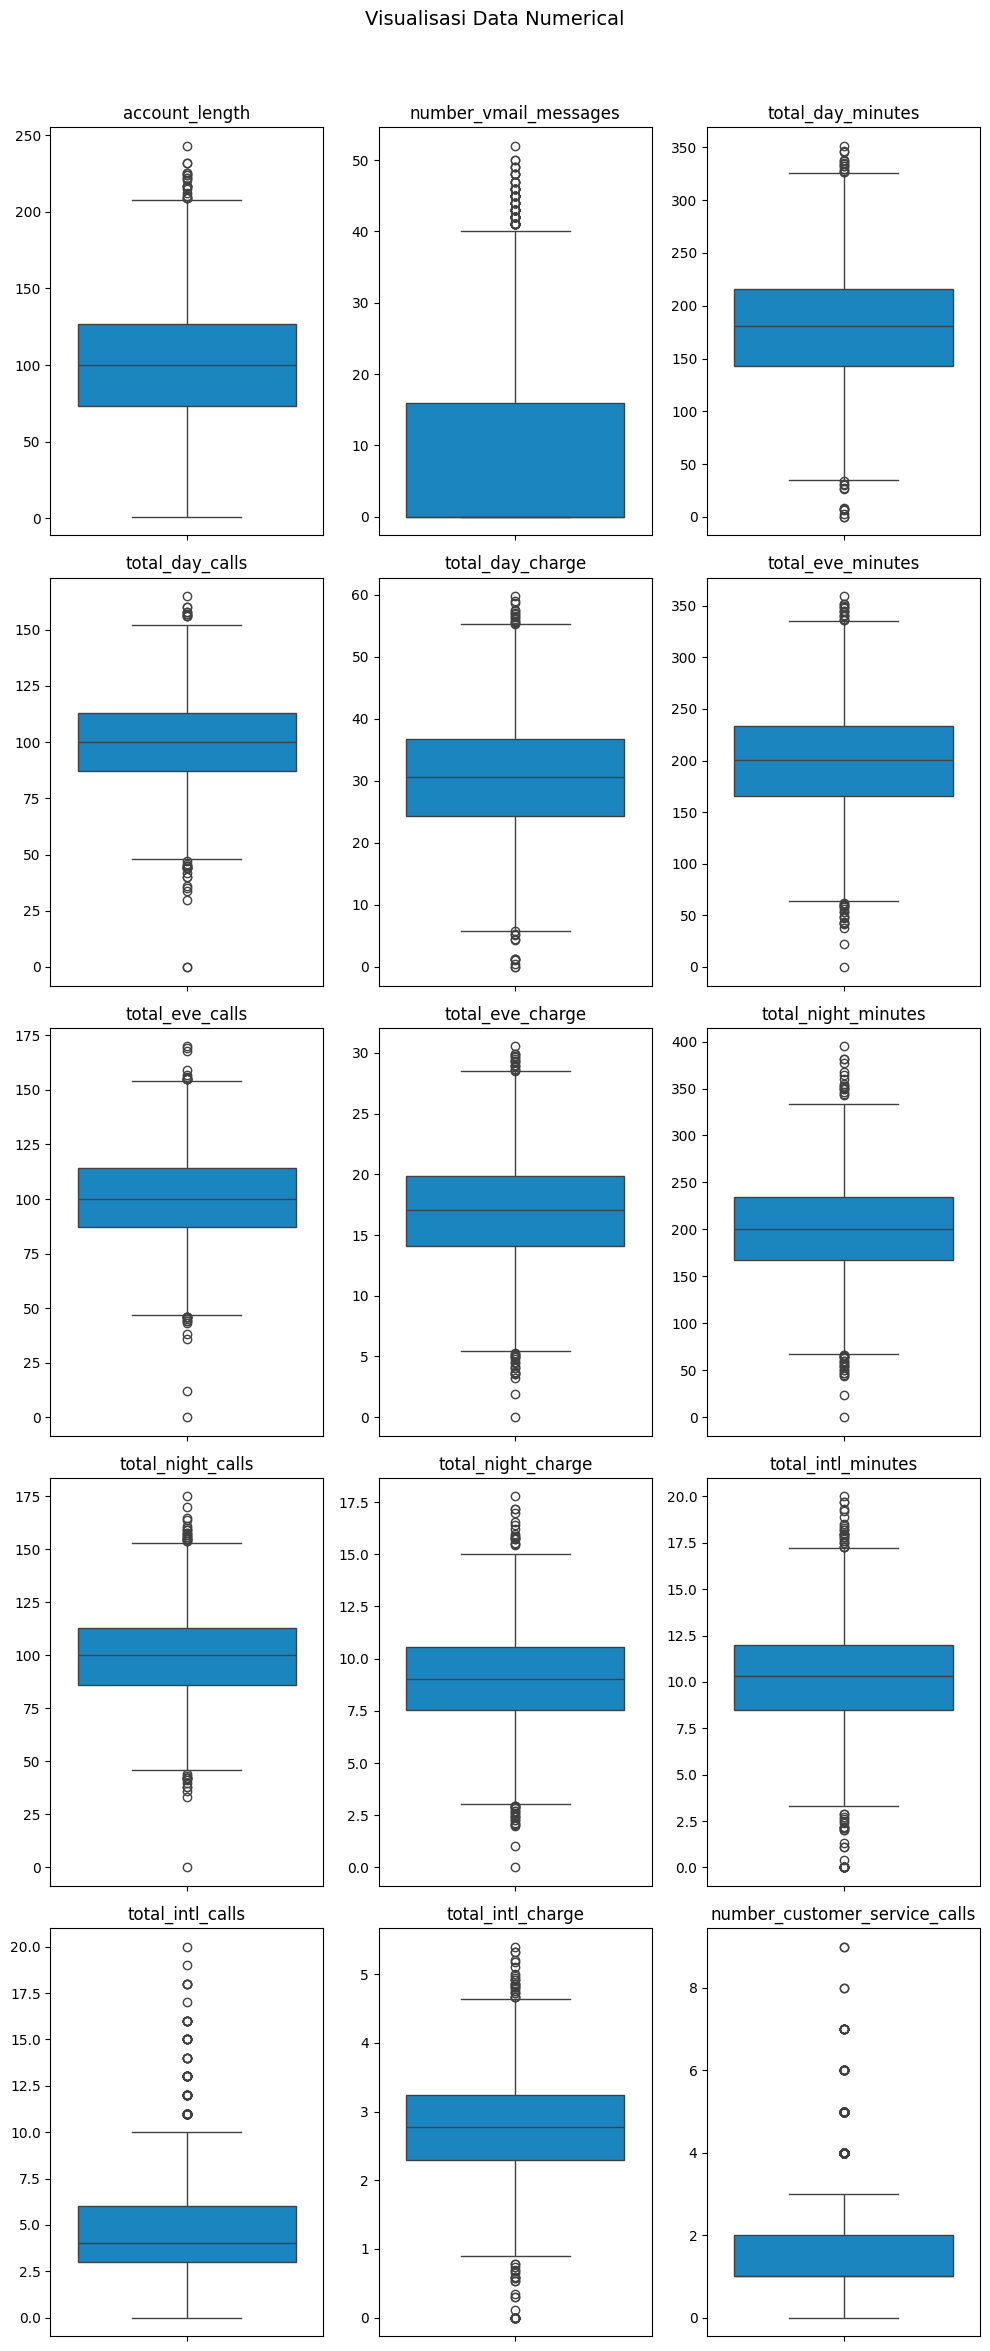

In [ ]:

f, ax = plt.subplots(5, 3, sharey=False, figsize=(10,23))

iterator=0
for i in range(5):
  for j in range(3):
    sns.boxplot(df[numerical_col[iterator]], ax=ax[i, j], palette=['#008DDA'])
    ax[i, j].set_ylabel('')
    ax[i, j].set_xlabel('')
    ax[i, j].set_title(numerical_col[iterator])
    iterator+=1
plt.suptitle('Visualisasi Data Numerical', fontsize=14,  y=1.02)
plt.tight_layout()
plt.show()

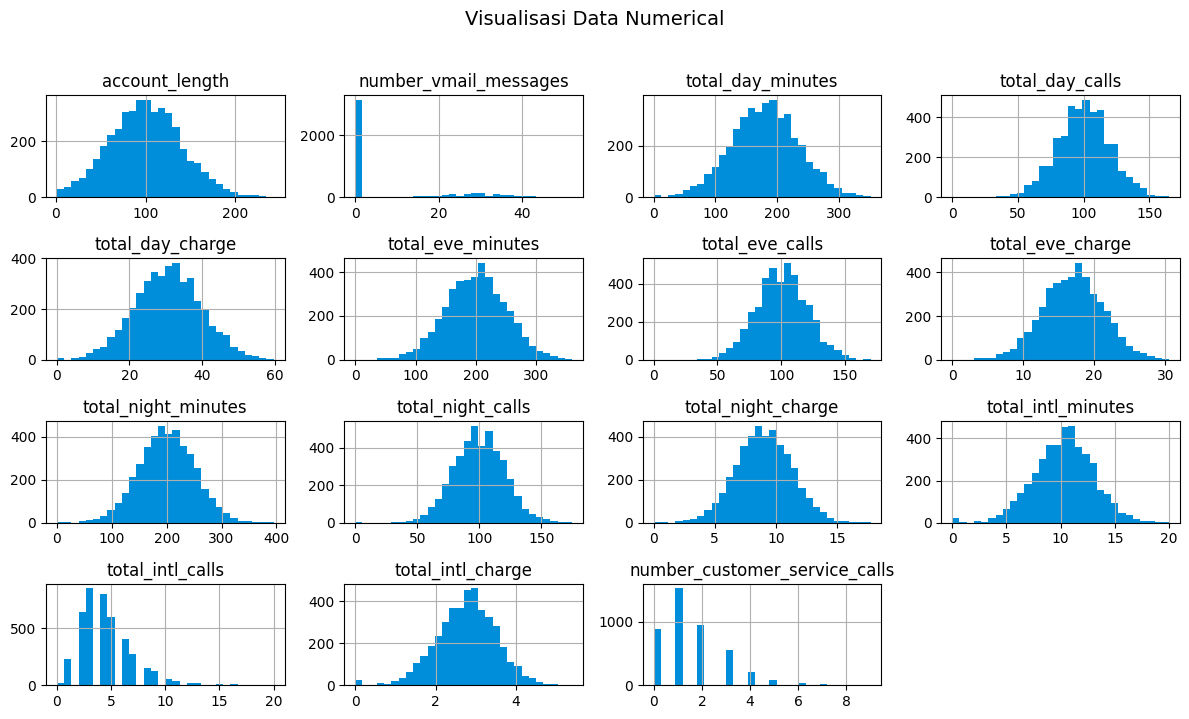

In [ ]:
df.hist(figsize=(12,7), color=['#008DDA'], bins=30)
plt.suptitle('Visualisasi Data Kategorikal', fontsize=14)
plt.tight_layout()
plt.suptitle('Visualisasi Data Numerical', fontsize=14,  y=1.02)
plt.show()

## Multivariate Analysis

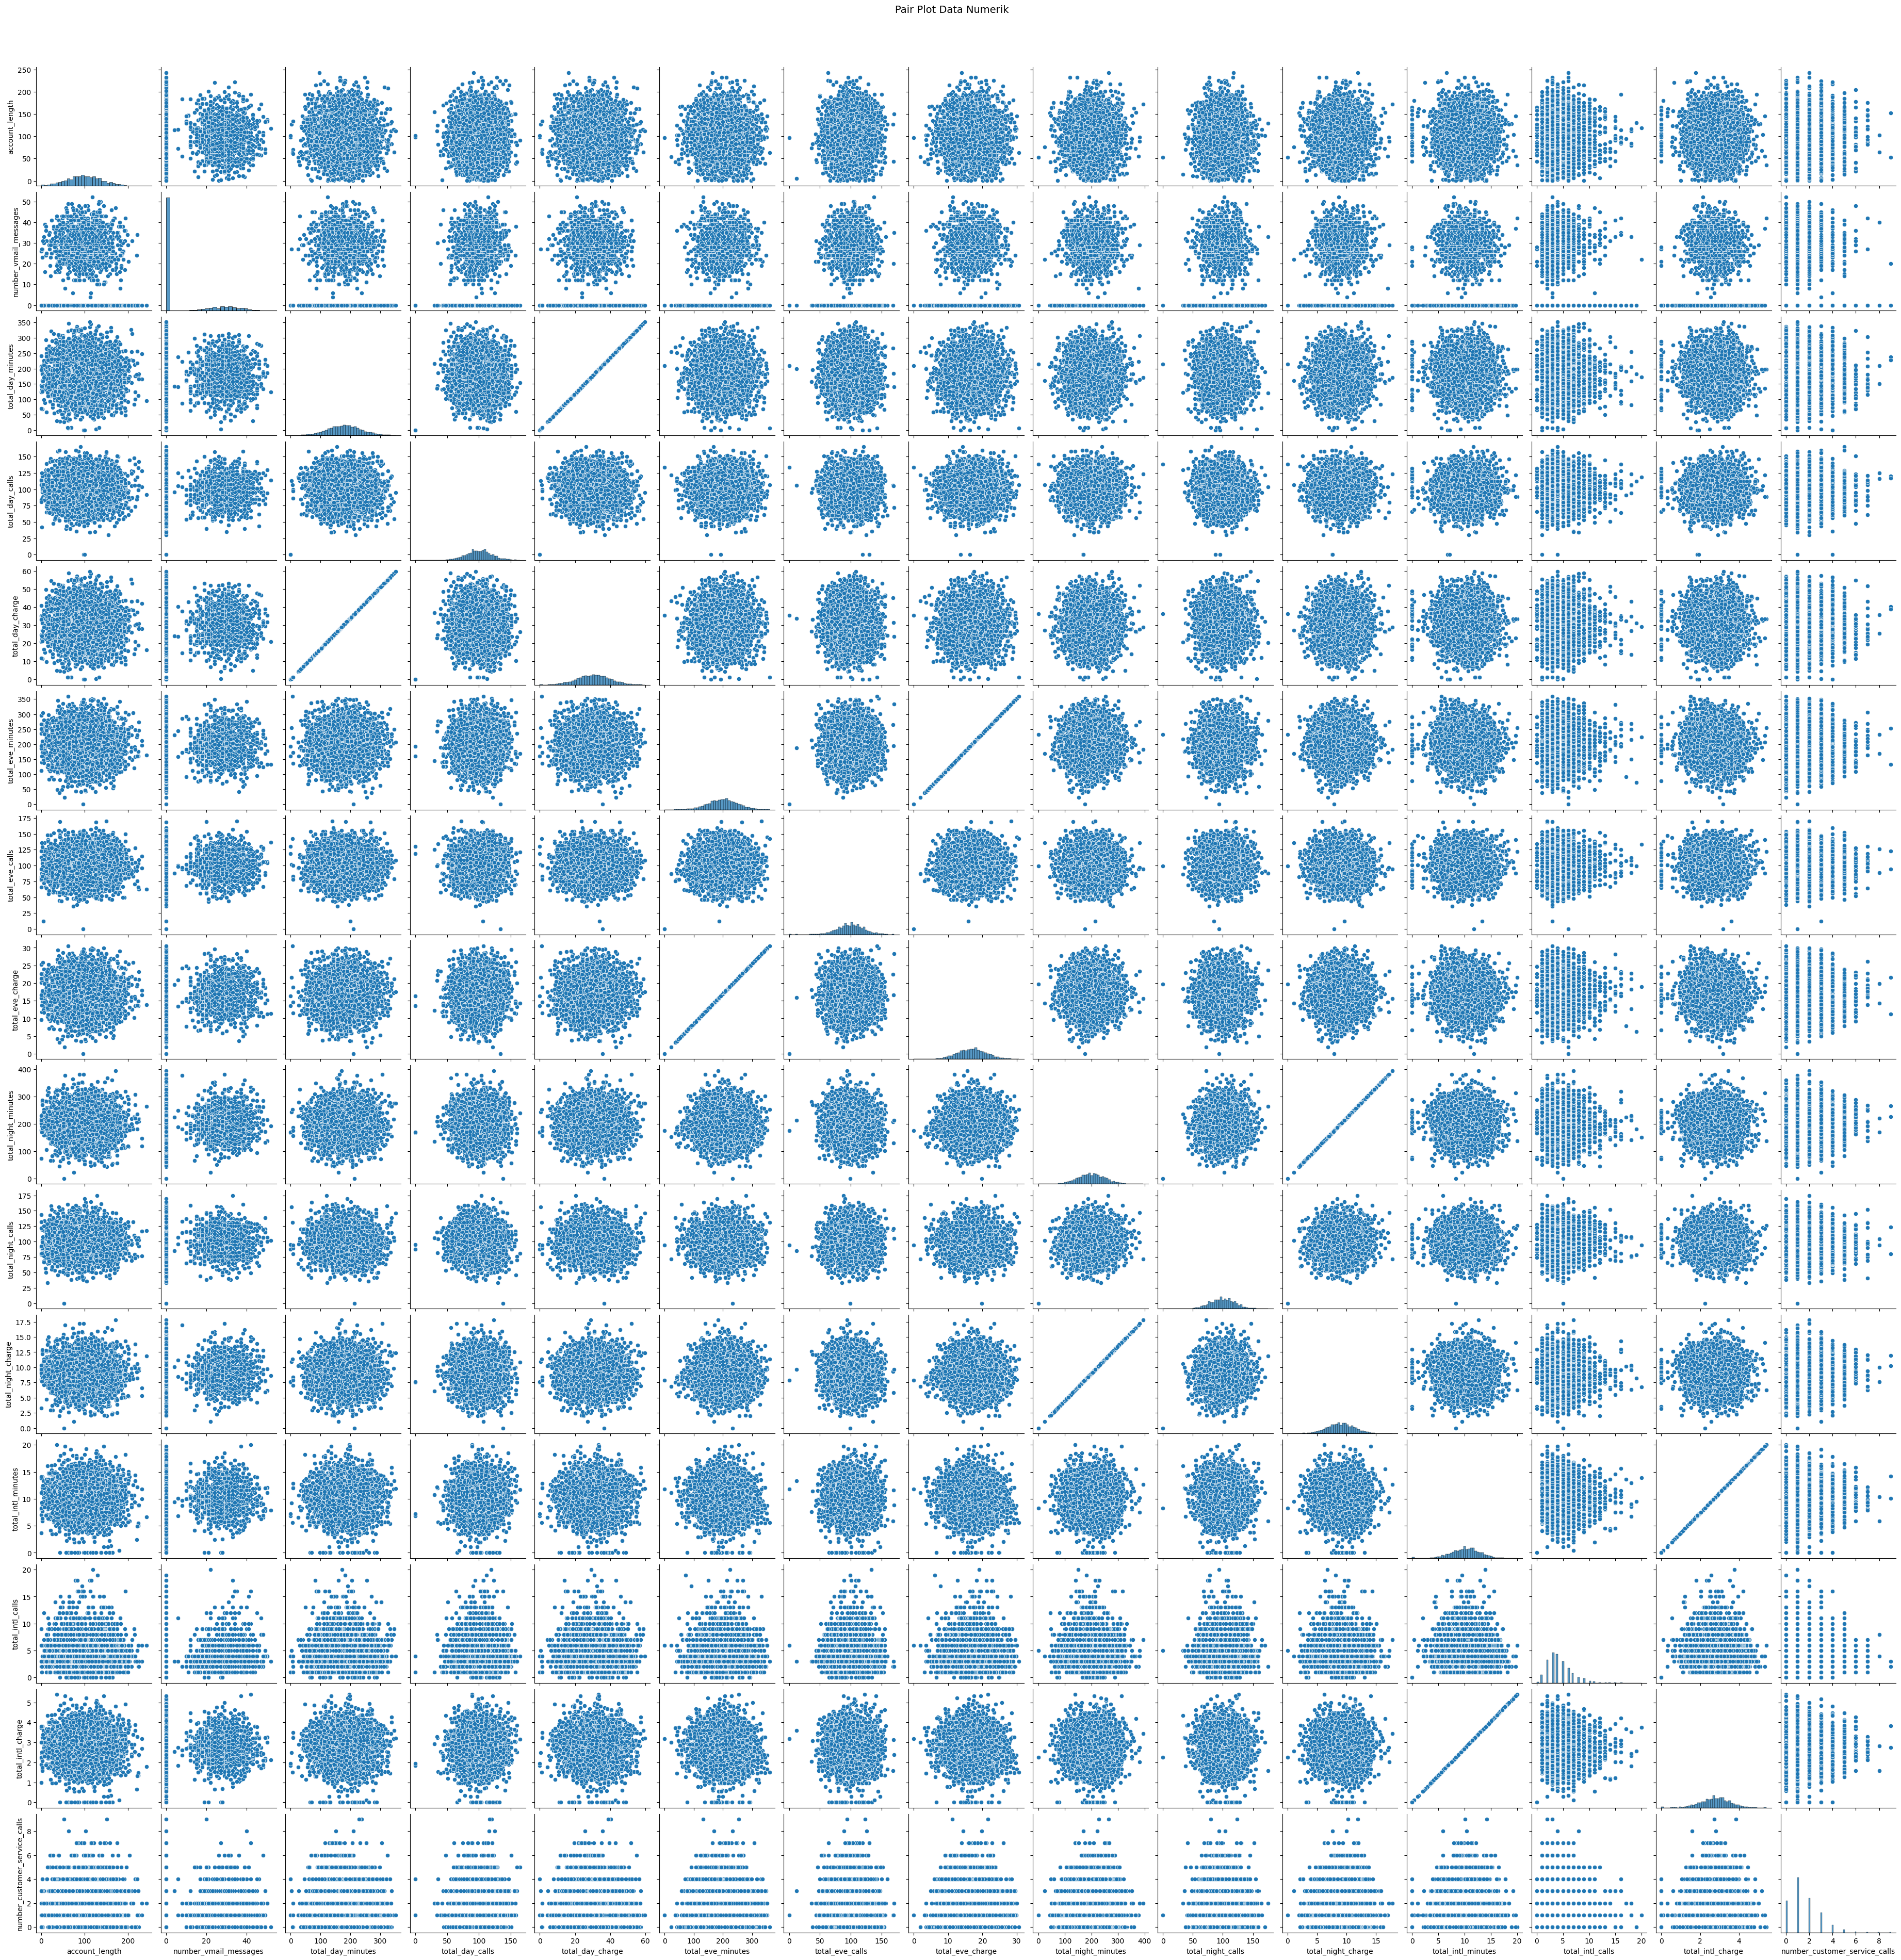

In [ ]:
sns.pairplot(df[numerical_col[:]], palette=['#008DDA'])
plt.suptitle('Pair Plot Data Numerik', fontsize=14,  y=1.02)
plt.show()

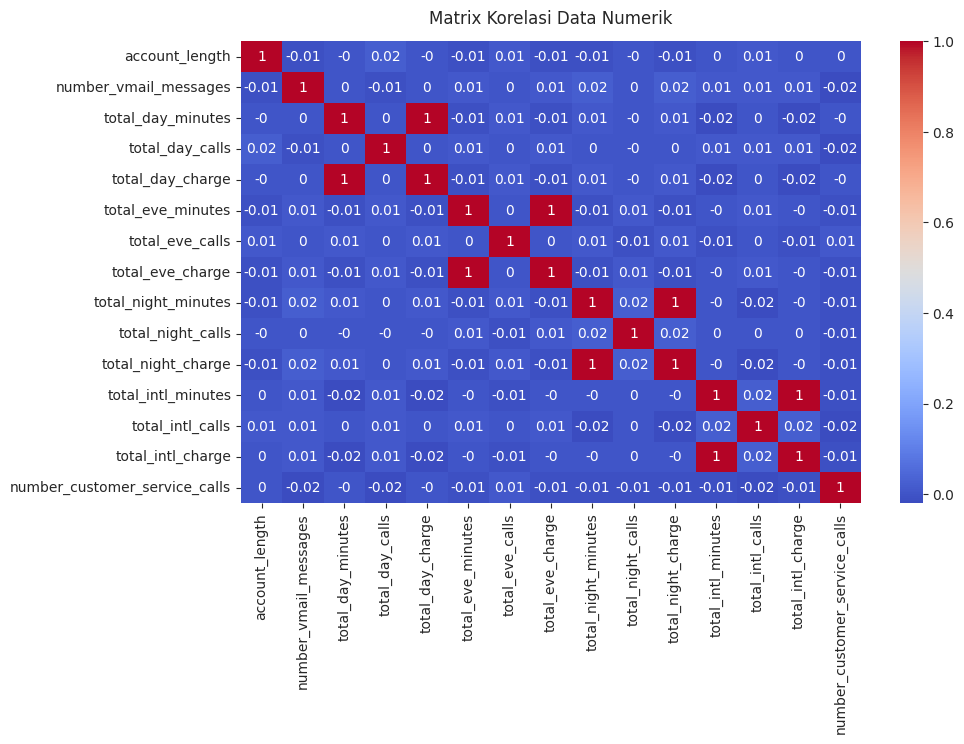

In [ ]:
corr_data = df[numerical_col[:]].corr().round(decimals=2)
plt.figure(figsize=(10,6))
sns.set_style('ticks')

sns.heatmap(corr_data,annot=True, cmap='coolwarm')
plt.title('Matrix Korelasi Data Numerik', y=1.02)
plt.show()

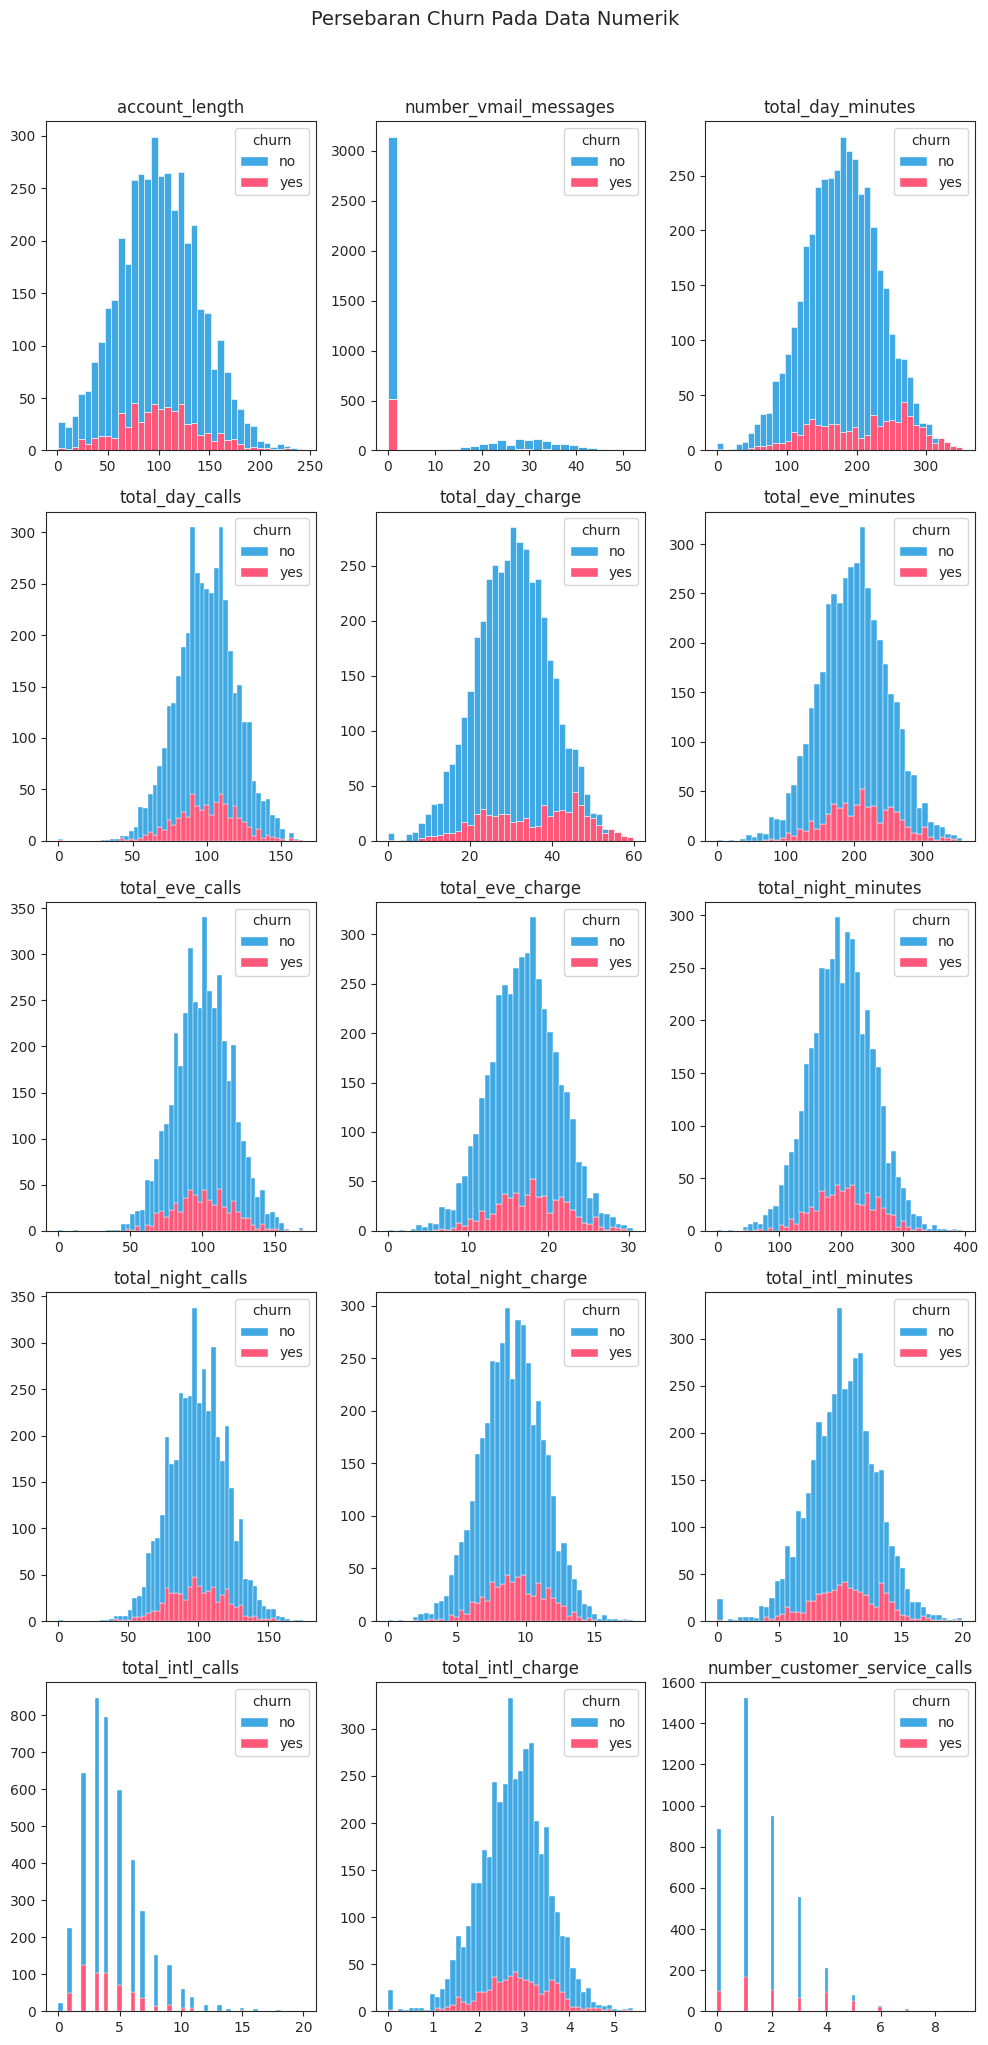

In [ ]:
f, ax = plt.subplots(5, 3, sharey=False, figsize=(10,20))

iterator=0
for i in range(5):
  for j in range(3):
    sns.histplot(data=df, x=numerical_col[iterator], ax=ax[i, j],hue='churn', multiple='stack', palette=['#008DDA','#FF204E'])
    ax[i, j].set_ylabel('')
    ax[i, j].set_xlabel('')
    ax[i, j].set_title(numerical_col[iterator])
    iterator+=1
plt.suptitle('Persebaran Churn Pada Data Numerik', fontsize=14,  y=1.02)
plt.tight_layout()

In [ ]:
churn_by_state = df.groupby('state')['churn'].value_counts().unstack()
churn_by_state['churn_percentage'] = churn_by_state['yes'] / (churn_by_state['yes'] + churn_by_state['no']) * 100

top_3_churn_states = churn_by_state['churn_percentage'].nlargest(3)

print("TIGA NEGARA DENGAN NILAI CHURN TERTINGGI:")
for idx, state in enumerate(top_3_churn_states.index, start=1):
    total_customers = churn_by_state.loc[state, 'yes'] + churn_by_state.loc[state, 'no']
    churn_customers = churn_by_state.loc[state, 'yes']
    print(f"{idx}. {state}\n   Jumlah pelanggan yang melakukan churn: {churn_customers}\n   Jumlah total pelanggan: {total_customers}\n   Persentase churn: {top_3_churn_states[state]:.2f}%\n")

bottom_3_churn_states = churn_by_state['churn_percentage'].nsmallest(3)

print("TIGA NEGARA DENGAN NILAI CHURN TERENDAH:")
for idx, state in enumerate(bottom_3_churn_states.index, start=1):
    total_customers = churn_by_state.loc[state, 'yes'] + churn_by_state.loc[state, 'no']
    churn_customers = churn_by_state.loc[state, 'yes']
    print(f"{idx}. {state}\n   Jumlah pelanggan yang melakukan churn: {churn_customers}\n   Jumlah total pelanggan: {total_customers}\n   Persentase churn: {bottom_3_churn_states[state]:.2f}%\n")

TIGA NEGARA DENGAN NILAI CHURN TERTINGGI:
1. NJ
   Jumlah pelanggan yang melakukan churn: 26
   Jumlah total pelanggan: 96
   Persentase churn: 27.08%

2. CA
   Jumlah pelanggan yang melakukan churn: 10
   Jumlah total pelanggan: 39
   Persentase churn: 25.64%

3. WA
   Jumlah pelanggan yang melakukan churn: 18
   Jumlah total pelanggan: 80
   Persentase churn: 22.50%

TIGA NEGARA DENGAN NILAI CHURN TERENDAH:
1. VA
   Jumlah pelanggan yang melakukan churn: 5
   Jumlah total pelanggan: 100
   Persentase churn: 5.00%

2. HI
   Jumlah pelanggan yang melakukan churn: 4
   Jumlah total pelanggan: 77
   Persentase churn: 5.19%

3. AK
   Jumlah pelanggan yang melakukan churn: 4
   Jumlah total pelanggan: 61
   Persentase churn: 6.56%



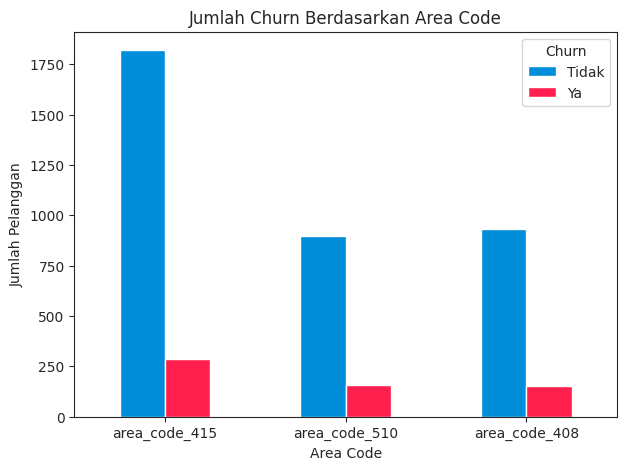

In [ ]:
# visualisasi
total_churn_per_area_code = df.groupby(['area_code', 'churn']).size().unstack().sort_values(by=['yes', 'no'], ascending=False)
# Plot bar chart
total_churn_per_area_code.plot(kind='bar', figsize=(7, 5), color=['#008DDA','#FF204E'])
plt.title('Jumlah Churn Berdasarkan Area Code')
plt.xlabel('Area Code')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Tidak', 'Ya'])
plt.show()

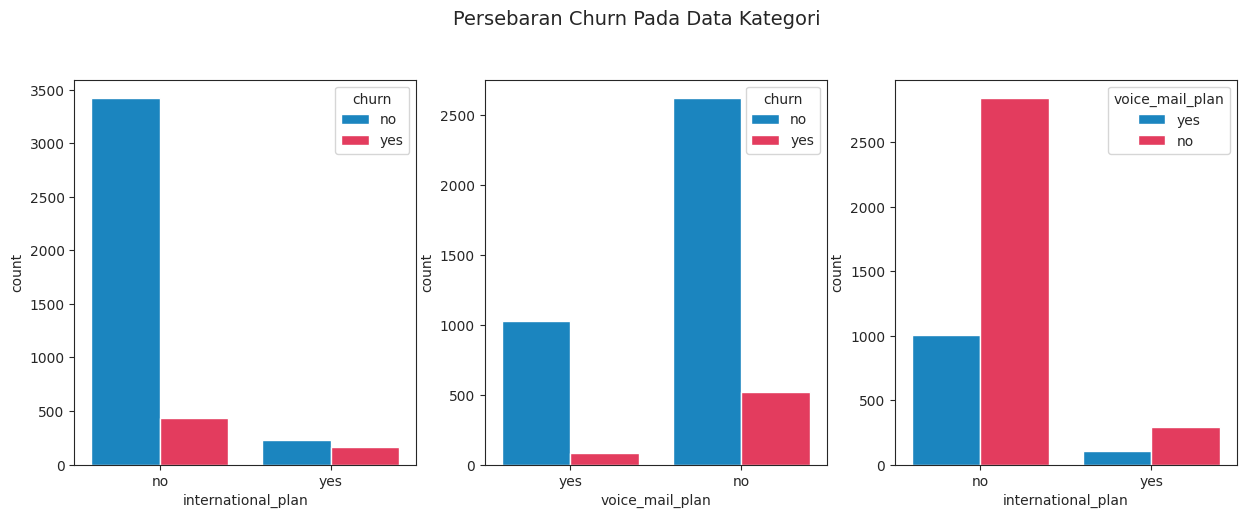

In [ ]:
# Analisis distribusi variabel kategorikal
plt.figure(figsize=(15, 5))

# Plot untuk variabel 'international_plan'
plt.subplot(1, 3, 1)
sns.countplot(x='international_plan', hue='churn', data=df, palette=['#008DDA','#FF204E'])

# Plot untuk variabel 'voice_mail_plan'
plt.subplot(1, 3, 2)
sns.countplot(x='voice_mail_plan', hue='churn', data=df, palette=['#008DDA','#FF204E'])

# Plot untuk hubungan antara 'international_plan' dan 'voice_mail_plan' terhadap 'churn'
plt.subplot(1, 3, 3)
sns.countplot(x='international_plan', hue='voice_mail_plan', data=df, palette=['#008DDA','#FF204E'])
plt.suptitle('Persebaran Churn Pada Data Kategori', fontsize=14,  y=1.02)
plt.show()

In [ ]:
# Menghitung jumlah churn berdasarkan area code
total_churn_per_area_code = df.groupby('area_code')['churn'].value_counts()
print("Jumlah churn berdasarkan area code:")
print(total_churn_per_area_code)

Jumlah churn berdasarkan area code:
area_code      churn
area_code_408  no        934
               yes       152
area_code_415  no       1821
               yes       287
area_code_510  no        897
               yes       159
Name: churn, dtype: int64


# Preprocessing

## Missing Value Checking

In [ ]:
print("Jumlah Missing Value Pada Tiap Kolom :")
print(df.isna().sum())

Jumlah Missing Value Pada Tiap Kolom :
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64


## Duplicate Value Checking

In [ ]:
print("jumlah data duplikat :" ,df.duplicated().sum())

jumlah data duplikat : 0


## Scaling

In [ ]:
df_normalized = df.copy()

In [ ]:
df_normalized[numerical_col[1:]]

number_vmail_messages  total_day_minutes  total_day_calls  \
0                        26             161.60              123   
1                         0             243.40              114   
2                         0             299.40               71   
3                         0             166.70              113   
4                        24             218.20               88   
...                     ...                ...              ...   
4245                      0             188.30               70   
4246                      0             177.90               89   
4247                      0             170.70              101   
4248                     40             235.70              127   
4249                     34             129.40              102   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0                27.47             195.50              103             16.62   
1                41.38             121.20              110             10.30   
2                50.90              61.90               88              5.26   
3                28.34             148.30              122             12.61   
4                37.09             348.50              108             29.62   
...                ...                ...              ...               ...   
4245             32.01             243.80               88             20.72   
4246             30.24             131.20               82             11.15   
4247             29.02             193.10              126             16.41   
4248             40.07             223.00              126             18.96   
4249             22.00             267.10              104             22.70   

      total_night_minutes  total_night_calls  total_night_charge  \
0                  254.40                103               11.45   
1                  162.60                104                7.32   
2                  196.90                 89                8.86   
3                  186.90                121                8.41   
4                  212.60                118                9.57   
...                   ...                ...                 ...   
4245               213.70                 79                9.62   
4246               186.20                 89                8.38   
4247               129.10                104                5.81   
4248               297.50                116               13.39   
4249               154.80                100                6.97   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
0                  13.70                 3               3.70   
1                  12.20                 5               3.29   
2                   6.60                 7               1.78   
3                  10.10                 3               2.73   
4                   7.50                 7               2.03   
...                  ...               ...                ...   
4245               10.30                 6               2.78   
4246               11.50                 6               3.11   
4247                6.90                 7               1.86   
4248                9.90                 5               2.67   
4249                9.30                16               2.51   

      number_customer_service_calls  
0                                 1  
1                                 0  
2                                 2  
3                                 3  
4                                 3  
...                             ...  
4245                              0  
4246                              3  
4247                              1  
4248                              2  
4249                              0  

[4250 rows x 14 columns]

Melakukan scaling pada kolom numerik yang dimiliki

In [ ]:
scaler = StandardScaler()
df_normalized[numerical_col[1:]] = scaler.fit_transform(df_normalized[numerical_col[1:]])

In [ ]:
df_normalized

state  account_length      area_code international_plan voice_mail_plan  \
0       OH             107  area_code_415                 no             yes   
1       NJ             137  area_code_415                 no              no   
2       OH              84  area_code_408                yes              no   
3       OK              75  area_code_415                yes              no   
4       MA             121  area_code_510                 no             yes   
...    ...             ...            ...                ...             ...   
4245    MT              83  area_code_415                 no              no   
4246    WV              73  area_code_408                 no              no   
4247    NC              75  area_code_408                 no              no   
4248    HI              50  area_code_408                 no             yes   
4249    VT              86  area_code_415                 no             yes   

      number_vmail_messages  total_day_minutes  total_day_calls  \
0                      1.37              -0.35             1.16   
1                     -0.57               1.17             0.71   
2                     -0.57               2.21            -1.46   
3                     -0.57              -0.25             0.66   
4                      1.22               0.70            -0.60   
...                     ...                ...              ...   
4245                  -0.57               0.15            -1.51   
4246                  -0.57              -0.04            -0.55   
4247                  -0.57              -0.18             0.06   
4248                   2.41               1.03             1.36   
4249                   1.96              -0.94             0.11   

      total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0                -0.35              -0.09             0.14             -0.09   
1                 1.17              -1.57             0.49             -1.57   
2                 2.21              -2.75            -0.61             -2.75   
3                -0.25              -1.03             1.10             -1.03   
4                 0.70               2.95             0.39              2.95   
...                ...                ...              ...               ...   
4245              0.15               0.87            -0.61              0.87   
4246             -0.04              -1.37            -0.91             -1.37   
4247             -0.18              -0.14             1.30             -0.14   
4248              1.03               0.45             1.30              0.46   
4249             -0.94               1.33             0.19              1.33   

      total_night_minutes  total_night_calls  total_night_charge  \
0                    1.07               0.16                1.07   
1                   -0.75               0.21               -0.75   
2                   -0.07              -0.54               -0.07   
3                   -0.27               1.05               -0.27   
4                    0.24               0.90                0.24   
...                   ...                ...                 ...   
4245                 0.26              -1.04                0.26   
4246                -0.28              -0.54               -0.28   
4247                -1.42               0.21               -1.42   
4248                 1.93               0.80                1.93   
4249                -0.91               0.01               -0.91   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
0                   1.25             -0.58               1.25   
1                   0.70              0.23               0.70   
2                  -1.32              1.05              -1.33   
3                  -0.06             -0.58              -0.05   
4                  -1.00              1.05              -0.99   
...                  ...               ...                ...   
4245  

## Encoding

In [ ]:
categorical_col[:-1]

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan'], dtype='object')

Menerapkan teknik one-hot encoding untuk merubah nilai pada kolom-kolom kategorik menjadi numerik

In [ ]:
df_encoded = df_normalized.copy()
df_encoded = pd.get_dummies(df_encoded, columns=categorical_col[:-1], drop_first=True)
df_encoded

account_length  number_vmail_messages  total_day_minutes  \
0                107                   1.37              -0.35   
1                137                  -0.57               1.17   
2                 84                  -0.57               2.21   
3                 75                  -0.57              -0.25   
4                121                   1.22               0.70   
...              ...                    ...                ...   
4245              83                  -0.57               0.15   
4246              73                  -0.57              -0.04   
4247              75                  -0.57              -0.18   
4248              50                   2.41               1.03   
4249              86                   1.96              -0.94   

      total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
0                1.16             -0.35              -0.09             0.14   
1                0.71              1.17              -1.57             0.49   
2               -1.46              2.21              -2.75            -0.61   
3                0.66             -0.25              -1.03             1.10   
4               -0.60              0.70               2.95             0.39   
...               ...               ...                ...              ...   
4245            -1.51              0.15               0.87            -0.61   
4246            -0.55             -0.04              -1.37            -0.91   
4247             0.06             -0.18              -0.14             1.30   
4248             1.36              1.03               0.45             1.30   
4249             0.11             -0.94               1.33             0.19   

      total_eve_charge  total_night_minutes  total_night_calls  ...  state_VA  \
0                -0.09                 1.07               0.16  ...         0   
1                -1.57                -0.75               0.21  ...         0   
2                -2.75                -0.07              -0.54  ...         0   
3                -1.03                -0.27               1.05  ...         0   
4                 2.95                 0.24               0.90  ...         0   
...                ...                  ...                ...  ...       ...   
4245              0.87                 0.26              -1.04  ...         0   
4246             -1.37                -0.28              -0.54  ...         0   
4247             -0.14                -1.42               0.21  ...         0   
4248              0.46                 1.93               0.80  ...         0   
4249              1.33                -0.91               0.01  ...         0   

      state_VT  state_WA  state_WI  state_WV state_WY  \
0            0         0         0         0        0   
1            0         0         0         0        0   
2            0         0         0         0        0   
3            0         0         0         0        0   
4            0         0         0         0        0   
...        ...       ...       ...       ...      ...   
4245         0         0         0         0        0   
4246         0         0         0         1        0   
4247         0         0         0         0        0   
4248         0         0         0         0        0   
4249         1         0         0         0        0   

      area_code_area_code_415  area_code_area_code_510  \
0                           1                        0   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        1   
...                       ...                      ...   
4245                        1                        0   
4246                        0                        0   
4247                        0                        0   
4248                      

Menerapkan label encoding pada kolom churn untuk merubah nilai kolom churn menjadi numerik

In [ ]:
le = LabelEncoder()
df_encoded['churn'] = le.fit_transform(df_normalized['churn'])
df_encoded

account_length  number_vmail_messages  total_day_minutes  \
0                107                   1.37              -0.35   
1                137                  -0.57               1.17   
2                 84                  -0.57               2.21   
3                 75                  -0.57              -0.25   
4                121                   1.22               0.70   
...              ...                    ...                ...   
4245              83                  -0.57               0.15   
4246              73                  -0.57              -0.04   
4247              75                  -0.57              -0.18   
4248              50                   2.41               1.03   
4249              86                   1.96              -0.94   

      total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
0                1.16             -0.35              -0.09             0.14   
1                0.71              1.17              -1.57             0.49   
2               -1.46              2.21              -2.75            -0.61   
3                0.66             -0.25              -1.03             1.10   
4               -0.60              0.70               2.95             0.39   
...               ...               ...                ...              ...   
4245            -1.51              0.15               0.87            -0.61   
4246            -0.55             -0.04              -1.37            -0.91   
4247             0.06             -0.18              -0.14             1.30   
4248             1.36              1.03               0.45             1.30   
4249             0.11             -0.94               1.33             0.19   

      total_eve_charge  total_night_minutes  total_night_calls  ...  state_VA  \
0                -0.09                 1.07               0.16  ...         0   
1                -1.57                -0.75               0.21  ...         0   
2                -2.75                -0.07              -0.54  ...         0   
3                -1.03                -0.27               1.05  ...         0   
4                 2.95                 0.24               0.90  ...         0   
...                ...                  ...                ...  ...       ...   
4245              0.87                 0.26              -1.04  ...         0   
4246             -1.37                -0.28              -0.54  ...         0   
4247             -0.14                -1.42               0.21  ...         0   
4248              0.46                 1.93               0.80  ...         0   
4249              1.33                -0.91               0.01  ...         0   

      state_VT  state_WA  state_WI  state_WV  state_WY  \
0            0         0         0         0         0   
1            0         0         0         0         0   
2            0         0         0         0         0   
3            0         0         0         0         0   
4            0         0         0         0         0   
...        ...       ...       ...       ...       ...   
4245         0         0         0         0         0   
4246         0         0         0         1         0   
4247         0         0         0         0         0   
4248         0         0         0         0         0   
4249         1         0         0         0         0   

      area_code_area_code_415  area_code_area_code_510  \
0                           1                        0   
1                           1                        0   
2                           0                        0   
3                           1                        0   
4                           0                        1   
...                       ...                      ...   
4245                        1                        0   
4246                        0                        0   
4247                        0                        0   
4248          

## Splitting

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_encoded.drop(['churn', 'account_length'], axis=1), df_encoded['churn'], test_size=0.4, stratify=df_encoded['churn'], random_state=42)

Pemeriksaan persebaran masing-masing kelas pada data training set, untuk memastikan bahwa data tersebar secara adil

<Axes: ylabel='churn'>

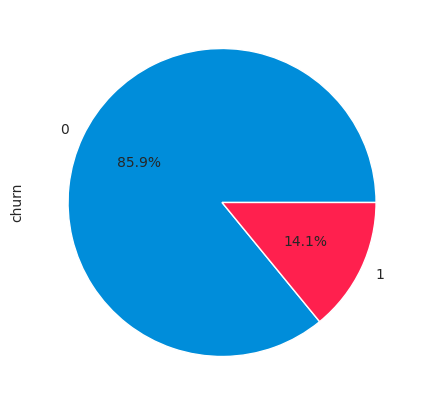

In [ ]:
y_train.value_counts().plot(kind='pie', figsize=(7, 5), autopct='%.1f%%', colors=['#008DDA','#FF204E'])

Pemeriksaan persebaran masing-masing kelas pada data validation set, untuk memastikan bahwa data tersebar secara adil

<Axes: ylabel='churn'>

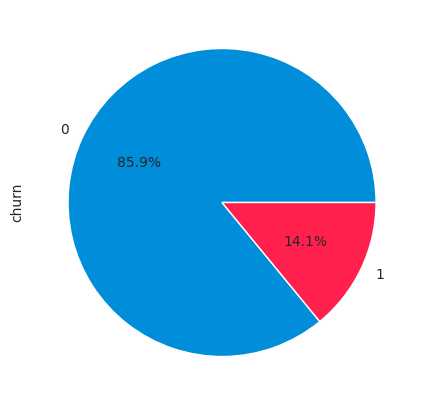

In [ ]:
y_test.value_counts().plot(kind='pie', figsize=(7, 5), autopct='%.1f%%', colors=['#008DDA','#FF204E'])

Menerapkan oversampling pada data training set karena data yang dimiliki tidak seimbang pada kelas-kelas yang dimiliki

In [ ]:
smote_nc = SMOTE(random_state=42)
x_resampled, y_resampled = smote_nc.fit_resample(x_train, y_train)

In [ ]:
print("hasil oversampling:")
print(y_resampled.value_counts())

hasil oversampling:
0    2191
1    2191
Name: churn, dtype: int64


# Modelling

## Lazy Predict

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_resampled, x_test, y_resampled, y_test)

 97%|█████████▋| 28/29 [00:15<00:00,  1.85it/s]

[LightGBM] [Info] Number of positive: 2191, number of negative: 2191
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3728
[LightGBM] [Info] Number of data points in the train set: 4382, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:16<00:00,  1.79it/s]


In [ ]:
models

Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LGBMClassifier                     0.95               0.89     0.89      0.95   
XGBClassifier                      0.95               0.89     0.89      0.95   
BaggingClassifier                  0.94               0.87     0.87      0.94   
RandomForestClassifier             0.94               0.85     0.85      0.94   
DecisionTreeClassifier             0.88               0.83     0.83      0.89   
ExtraTreesClassifier               0.91               0.77     0.77      0.90   
AdaBoostClassifier                 0.86               0.76     0.76      0.86   
NearestCentroid                    0.78               0.69     0.69      0.80   
ExtraTreeClassifier                0.78               0.68     0.68      0.80   
LogisticRegression                 0.86               0.65     0.65      0.85   
PassiveAggressiveClassifier        0.82               0.65     0.65      0.82   
SGDClassifier                      0.81               0.65     0.65      0.82   
BernoulliNB                        0.77               0.64     0.64      0.79   
LinearSVC                          0.85               0.61     0.61      0.84   
Perceptron                         0.77               0.58     0.58      0.78   
CalibratedClassifierCV             0.86               0.57     0.57      0.83   
LabelSpreading                     0.83               0.57     0.57      0.81   
LabelPropagation                   0.83               0.57     0.57      0.81   
KNeighborsClassifier               0.84               0.54     0.54      0.81   
RidgeClassifier                    0.86               0.54     0.54      0.82   
RidgeClassifierCV                  0.86               0.54     0.54      0.82   
LinearDiscriminantAnalysis         0.86               0.54     0.54      0.82   
GaussianNB                         0.78               0.54     0.54      0.78   
QuadraticDiscriminantAnalysis      0.81               0.53     0.53      0.79   
SVC                                0.86               0.52     0.52      0.81   
DummyClassifier                    0.86               0.50     0.50      0.79   
NuSVC                              0.85               0.50     0.50      0.79   

                               Time Taken  
Model                                      
LGBMClassifier                       0.56  
XGBClassifier                        0.92  
BaggingClassifier                    0.58  
RandomForestClassifier               2.02  
DecisionTreeClassifier               0.12  
ExtraTreesClassifier                 0.67  
AdaBoostClassifier                   0.58  
NearestCentroid                      0.04  
ExtraTreeClassifier                  0.03  
LogisticRegression                   0.07  
PassiveAggressiveClassifier          0.08  
SGDClassifier                        0.16  
BernoulliNB                          0.04  
LinearSVC                            0.74  
Perceptron                           0.05  
CalibratedClassifierCV               2.70  
LabelSpreading                       1.35  
LabelPropagation                     0.94  
KNeighborsClassifier                 0.15  
RidgeClassifier                      0.08  
RidgeClassifierCV                    0.15  
LinearDiscriminantAnalysis           0.13  
GaussianNB                           0.03  
QuadraticDiscriminantAnalysis        0.14  
SVC                                  0.98  
DummyClassifier                      0.03  
NuSVC                                2.72

Terlihat bahwa model XGBoost dan LightGBM merupakan 2 algoritma yang paling optimal namun secara komputasi LightGBM memiliki waktu jauh lebih sedikit

### XGBoost

Memanfaatkan grid search untuk mencari parameter terbaik pada model XGBoost

#### XGB Grid Search

In [ ]:
param = {"max_delta_step" : [1, 3, 5], "max_depth" : [6, 4, 2], 'eta' : [0.3, 0.03, 0.003]}

In [ ]:
xgb = XGBClassifier()

In [ ]:
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param,
    scoring = 'f1',
    cv = 3,
    verbose=3
)

In [ ]:
grid_search.fit(x_resampled, y_resampled)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END eta=0.3, max_delta_step=1, max_depth=6;, score=0.903 total time=   0.3s
[CV 2/3] END eta=0.3, max_delta_step=1, max_depth=6;, score=0.977 total time=   0.3s
[CV 3/3] END eta=0.3, max_delta_step=1, max_depth=6;, score=0.980 total time=   0.3s
[CV 1/3] END eta=0.3, max_delta_step=1, max_depth=4;, score=0.874 total time=   0.2s
[CV 2/3] END eta=0.3, max_delta_step=1, max_depth=4;, score=0.965 total time=   0.2s
[CV 3/3] END eta=0.3, max_delta_step=1, max_depth=4;, score=0.975 total time=   0.2s
[CV 1/3] END eta=0.3, max_delta_step=1, max_depth=2;, score=0.842 total time=   0.1s
[CV 2/3] END eta=0.3, max_delta_step=1, max_depth=2;, score=0.921 total time=   0.2s
[CV 3/3] END eta=0.3, max_delta_step=1, max_depth=2;, score=0.938 total time=   0.1s
[CV 1/3] END eta=0.3, max_delta_step=3, max_depth=6;, score=0.909 total time=   0.3s
[CV 2/3] END eta=0.3, max_delta_step=3, max_depth=6;, score=0.976 total time=   0.3s
[CV 

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'eta': [0.3, 0.03, 0.003], 'max_delta_step': [1, 3, 5],
                         'max_depth': [6, 4, 2]},
             scoring='f1', verbose=3)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'eta': 0.3, 'max_delta_step': 1, 'max_depth': 6}
0.9529633411023966


#### Building XGB Model

In [ ]:
xgb = XGBClassifier(eta=0.3, max_delta_step=1, max_depth=6)

In [ ]:
xgb.fit(x_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=1, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred = xgb.predict(x_test)
y_true = y_test
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1461
           1       0.89      0.80      0.84       239

    accuracy                           0.96      1700
   macro avg       0.93      0.89      0.91      1700
weighted avg       0.96      0.96      0.96      1700



### LGBM

Memanfaatkan grid search untuk mendapatkan parameter terbaik pada algoritma LightGBM

#### LGBM Grid Search

In [ ]:
param = {'num_iterations' : [100, 200, 300], 'learning_rate' : [0.1, 0.01, 0.001]}

In [ ]:
lgbm = LGBMClassifier(metric=['auc', 'f1score', 'recall'])

In [ ]:
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param,
    scoring = 'f1',
    cv = 3,
    verbose=False
)

In [ ]:
grid_search.fit(x_resampled, y_resampled)

[LightGBM] [Info] Number of positive: 1461, number of negative: 1460
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3509
[LightGBM] [Info] Number of data points in the train set: 2921, number of used features: 66
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500171 -> initscore=0.000685
[LightGBM] [Info] Start training from score 0.000685
[LightGBM] [Info] Number of positive: 1460, number of negative: 1461
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3498
[LightGBM] [Info] Number of data points in the train set: 2921, number of used features: 67
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499829 -> initscore=-0.000685
[LightGBM]

GridSearchCV(cv=3,
             estimator=LGBMClassifier(metric=['auc', 'f1score', 'recall']),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'num_iterations': [100, 200, 300]},
             scoring='f1', verbose=False)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'num_iterations': 100}
0.949954747025649


#### Building LGBM Model

In [ ]:
lgbm = LGBMClassifier(metric=['auc', 'f1score', 'recall'], learning_rate=0.1, num_iterations=100)

lgbm.fit(x_resampled, y_resampled)

[LightGBM] [Info] Number of positive: 2191, number of negative: 2191
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000482 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3674
[LightGBM] [Info] Number of data points in the train set: 4382, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(metric=['auc', 'f1score', 'recall'], num_iterations=100)

In [ ]:
y_pred = lgbm.predict(x_test)
y_true = y_test

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1461
           1       0.88      0.81      0.84       239

    accuracy                           0.96      1700
   macro avg       0.92      0.90      0.91      1700
weighted avg       0.96      0.96      0.96      1700



Dari 2 uji coba model XGBoost dan LightGBM terlihat bahwa kedua model memiliki performa yang hampir sama namun karena LightGBM memiliki komputasi yang lebih rendah dariapda XGBoost maka dipilihlah LightGBM sebagai algoritma terpilih.

# Testing

In [ ]:
df_test = pd.read_csv('Data Test.csv')
df_test = df_test.drop(['id', 'account_length'], axis=1)

Scaling pada data test

In [ ]:
df_test[numerical_col[1:]] = scaler.fit_transform(df_test[numerical_col[1:]])

one-hot encoding pada data test

In [ ]:
df_test = pd.get_dummies(df_test, columns=categorical_col[:-1], drop_first=True)

Melihat apakah ada fitur pada data test sudah lengkap sesuai dengan data train

In [ ]:
not_intersection = list(set(df_test.columns) - set(x_test.columns))
not_intersection

[]

Melakukan prediksi churn pada data test menggunakan LightGBM

In [ ]:
y_test_pred = lgbm.predict(df_test)

In [ ]:
df_test['churn'] = y_test_pred
df_test['churn'].value_counts()

1    470
0    280
Name: churn, dtype: int64

Melakukan inverse transform agar kolom churn berubah menjadi yes dan no

In [ ]:
df_test['churn'] = le.inverse_transform(y_test_pred)

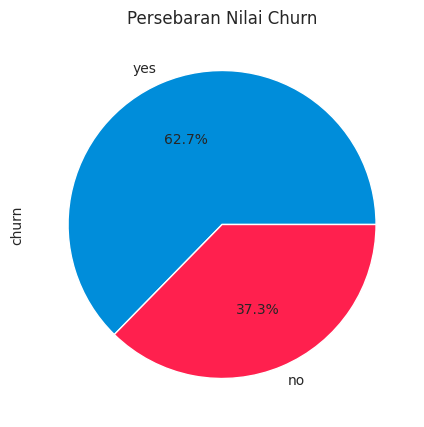

In [ ]:
test_churn = df_test['churn'].value_counts()
test_churn.plot(kind='pie', figsize=(7, 5), autopct='%.1f%%', colors=['#008DDA','#FF204E'])
plt.title('Persebaran Nilai Churn')
plt.show()

In [ ]:
print("\nJumlah pelanggan yang diprediksi melakukan churn/tidak:")
print(test_churn)


Jumlah pelanggan yang diprediksi melakukan churn/tidak:
yes    470
no     280
Name: churn, dtype: int64
